In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [ ]:
import pickle

In [ ]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/Undersampled_dataset
!ls

/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/Undersampled_dataset
'Test dataset'	  X_test.pickle    Y_test.pickle
'Train dataset'   X_train.pickle   Y_train.pickle


In [ ]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [ ]:
import numpy as np
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
y = np.array(Y_train)

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import keras.optimizers
import numpy as np
import pandas as pd
import os
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model
import tensorflow as tf

In [ ]:
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_Undersampling _UfR_0-75_wThreshold{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_Undersampling_UfR_0-75_wThreshold{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, valLoss_threshold, valAccuracy_threshold):
        super(MyThresholdCallback, self).__init__()
        self.valLoss_threshold = valLoss_threshold
        self.valAccuracy_threshold = valAccuracy_threshold
        

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs["val_loss"] 
        val_accuracy = logs["val_accuracy"]
        if (val_loss <= self.valLoss_threshold) and (val_accuracy >= self.valAccuracy_threshold):
            #print(f'Total Epochs Completed: {logs["Epoch"]}')
            self.model.stop_training = True

my_callback = MyThresholdCallback(valLoss_threshold=1.0,valAccuracy_threshold=0.9)            

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/500
39/39 [==============================] - 16s 102ms/step - loss: 0.5104 - accuracy: 0.7715 - val_loss: 8.6691 - val_accuracy: 0.2390
Epoch 2/500
39/39 [==============================] - 2s 60ms/step - loss: 0.2635 - accuracy: 0.8911 - val_loss: 13.6514 - val_accuracy: 0.2390
Epoch 3/500
39/39 [==============================] - 2s 60ms/step - loss: 0.1871 - accuracy: 0.9341 - val_loss: 8.6961 - val_accuracy: 0.2512
Epoch 4/500
39/39 [==============================] - 2s 60ms/step - loss: 0.1854 - accuracy: 0.9228 - val_loss: 4.3141 - val_accuracy: 0.2512
Epoch 5/500
39/39 [==============================] - 2s 61ms/step - loss: 0.0941 - accuracy: 0.9650 - val_loss: 4.1924 - val_accuracy: 0.3000
Epoch 6/500
39/39 [==============================] - 2s 61ms/step - loss: 0.0962 - accuracy: 0.9610 - val_loss: 6.0607 - val_accuracy: 0.3171
Epoch 7/500
39/39 [==============================] - 3s 66ms/step - loss: 0.0727 -

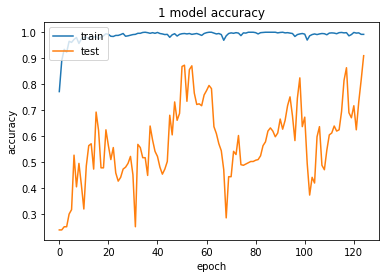

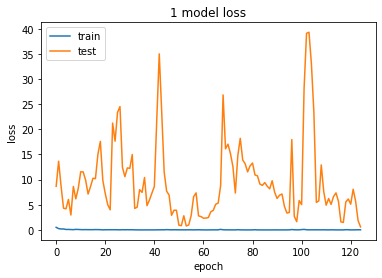

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_Undersampling_UfR_0-75_wThreshold[   1    4    5 ... 1635 1638 1639]_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/Undersampled_dataset
Score for fold 1: loss of 0.25851383805274963; accuracy of 96.95122241973877%
26/26 [==============================] - 3s 80ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       410
           1       1.00      1.00      1.00       410
           2       0.97      0.92      0.95       410
           3       0.93      0.97      0.95       410

    accuracy                           0.97      1640
   macro avg       0.97      0.97      0.97      1640
weighted avg       0.97      0.97      0.97      1640

13/13 [==============================] - 1s 83ms/step
Classification report on Test data:-1
    

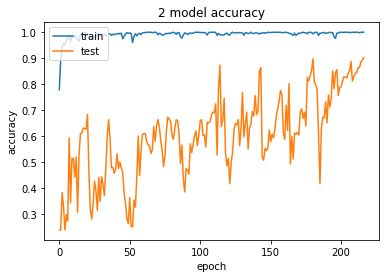

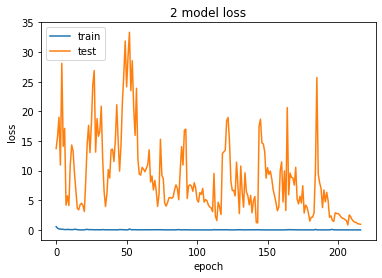

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_Undersampling_UfR_0-75_wThreshold[   0    2    3 ... 1636 1637 1638]_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/Undersampled_dataset
Score for fold 2: loss of 0.3134027421474457; accuracy of 96.64633870124817%
26/26 [==============================] - 2s 65ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       410
           1       1.00      0.99      1.00       410
           2       0.98      0.95      0.96       410
           3       0.97      0.95      0.96       410

    accuracy                           0.97      1640
   macro avg       0.97      0.97      0.97      1640
weighted avg       0.97      0.97      0.97      1640

13/13 [==============================] - 1s 64ms/step
Classification report on Test data:-2
     

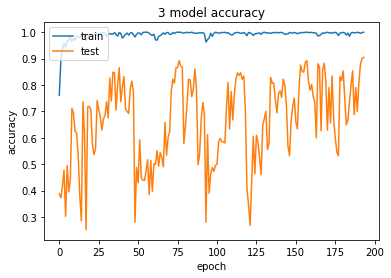

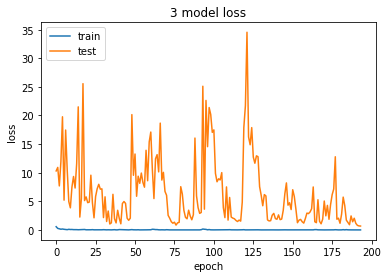

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_Undersampling_UfR_0-75_wThreshold[   0    1    2 ... 1636 1637 1639]_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/Undersampled_dataset
Score for fold 3: loss of 0.21647104620933533; accuracy of 96.95122241973877%
26/26 [==============================] - 2s 64ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       410
           1       1.00      1.00      1.00       410
           2       0.97      0.95      0.96       410
           3       0.93      0.97      0.95       410

    accuracy                           0.97      1640
   macro avg       0.97      0.97      0.97      1640
weighted avg       0.97      0.97      0.97      1640

13/13 [==============================] - 1s 64ms/step
Classification report on Test data:-3
    

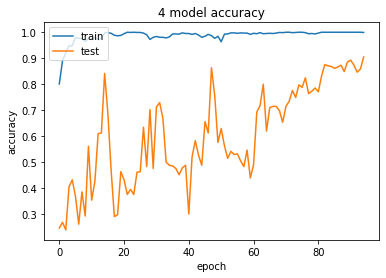

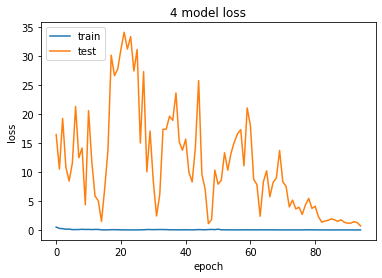

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_Undersampling_UfR_0-75_wThreshold[   0    1    2 ... 1637 1638 1639]_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/Undersampled_dataset
Score for fold 4: loss of 0.05332820490002632; accuracy of 98.17073345184326%
26/26 [==============================] - 2s 64ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       410
           1       1.00      1.00      1.00       410
           2       0.98      0.93      0.96       410
           3       0.94      0.97      0.96       410

    accuracy                           0.98      1640
   macro avg       0.98      0.98      0.98      1640
weighted avg       0.98      0.98      0.98      1640

13/13 [==============================] - 1s 64ms/step
Classification report on Test data:-4
    

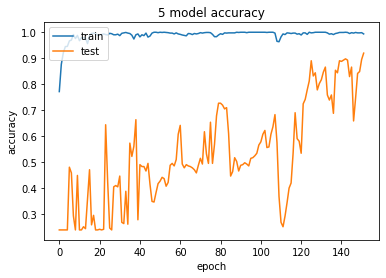

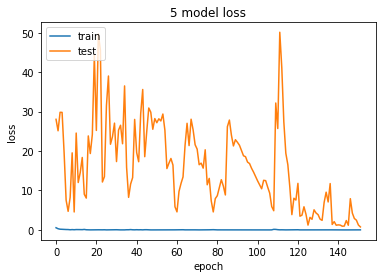

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_Undersampling_UfR_0-75_wThreshold[   0    1    2 ... 1637 1638 1639]_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/Undersampled_dataset
Score for fold 5: loss of 0.08399628102779388; accuracy of 99.39024448394775%
26/26 [==============================] - 2s 65ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       410
           1       1.00      1.00      1.00       410
           2       0.96      0.97      0.96       410
           3       0.96      0.95      0.96       410

    accuracy                           0.98      1640
   macro avg       0.98      0.98      0.98      1640
weighted avg       0.98      0.98      0.98      1640

13/13 [==============================] - 1s 64ms/step
Classification report on Test data:-5
    

In [ ]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 500
train = 75

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

  CLASSES = 4
  x = base_model.output
  x = GlobalAveragePooling2D(name='avg_pool')(x)
  x = Dropout(0.4)(x)
  predictions = Dense(CLASSES, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in model.layers[0:110]:
    layer.trainable = False  # should be False

  for layer in model.layers[110:]:
    layer.trainable = True  # should be True

  optm = optimizers.Adam(learning_rate=0.001)    
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )
  
  #logs = f'/content/gdrive/MyDrive/Colab Notebooks/Logs/MobileNet_Kfold/fold_no_{fold_no}/'
  
  logs = f'/content/gdrive/MyDrive/Logs/MobileNet_Kfold/MobileNet_Undersampling_UfR_0-75_wThreshold_fold_no_{fold_no}/'

  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [my_callback],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_Undersampling_UfR_0-75_wThreshold{train}_epochs_{epochs}/'
  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'MobileNet_UfR_Undersampling_0-75_Kfold_wThreshold_history_{train}_fold_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 